In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Discrete uniform distribution

- https://en.wikipedia.org/wiki/Discrete_uniform_distribution

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Uniform_discrete_pmf_svg.svg)

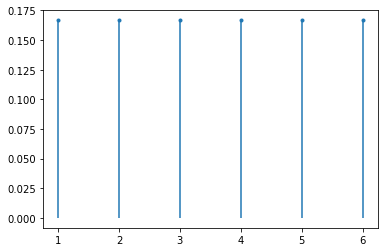

In [2]:
def discrete_uniform(a, b, x=None):
    if x is None:
        x = np.arange(a, b+1)
    else:
        x = np.array([x])
    x = x.flatten()
    n = (b-a)+1
    nx = len(x)
    px = np.array([1/n]*nx)
    return x, px

x, px = discrete_uniform(a=1, b=6)


plt.vlines(x, 0, px)
plt.plot(x, px, '.')

In [3]:
p_table = pd.DataFrame({'X': x, 'px': px, 'Fx': np.round(px.cumsum(), 8)})
p_table

,X,px,Fx
0,1,0.166667,0.166667
1,2,0.166667,0.333333
2,3,0.166667,0.500000
3,4,0.166667,0.666667
4,5,0.166667,0.833333
5,6,0.166667,1.000000


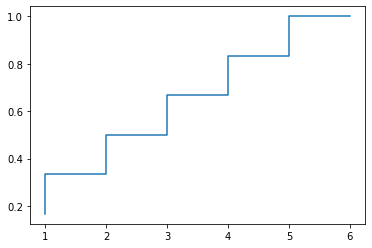

In [4]:
plt.step(p_table.X, p_table.Fx)

In [5]:
def discrete_uniform_cdf(a, b, x):
    X = np.arange(a, x+1)
    Fx = discrete_uniform(a=1, b=6, x=X)[1].sum()
    return Fx

discrete_uniform(a=1, b=6, x=[2, 3, 4])[1].sum()

discrete_uniform_cdf(a=1, b=6, x=4) - discrete_uniform_cdf(a=1, b=6, x=1)

0.5

In [6]:
discrete_uniform_cdf(a=1, b=6, x=4) - discrete_uniform_cdf(a=1, b=6, x=3)


0.16666666666666663

In [7]:
rep = 10
[int(np.random.random()*6)+1 for i in range(rep)]

[2, 3, 4, 2, 6, 2, 5, 2, 6, 5]

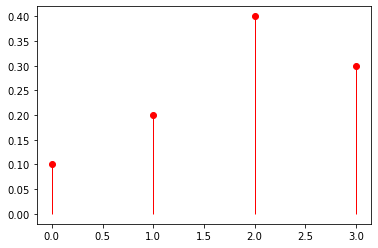

In [33]:
x = np.arange(0, 4)
pmfx = np.array([.1, .2, .4, .3])

def plot_pmf(x, pmfx):
    fig, ax = plt.subplots(1, 1)
    ax.vlines(x, 0, pmfx, colors='r', linestyles='-', lw=1)
    ax.plot(x, pmfx, 'ro', label='Pmf')
    #plt.show()
    
plot_pmf(x, pmfx)

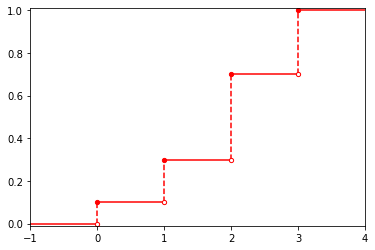

In [9]:
x = np.arange(-1, 5)  # Provide range +-1
cdfx = np.array([.1, .3, .7, 1.])  # CDF

def plot_cdf(rvs_range, cdf_prob):
    yn = np.insert(cdf_prob, 0, 0)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')

    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
    ax.hlines(y=yn, xmin=rvs_range[:-1], xmax=rvs_range[1:],
              color='red', zorder=1)

    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
    ax.vlines(x=rvs_range[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
              linestyle='dashed', zorder=1)

    ax.scatter(rvs_range[1:-1], cdf_prob, color='red', s=18, zorder=2)
    ax.scatter(rvs_range[1:-1], yn[:-1], color='white', s=18, zorder=2,
               edgecolor='red')
    ax.grid(False)
    ax.set_xlim(rvs_range[0], rvs_range[-1])
    ax.set_ylim([-0.01, 1.01])
    plt.show()
    
plot_cdf(x, cdfx)

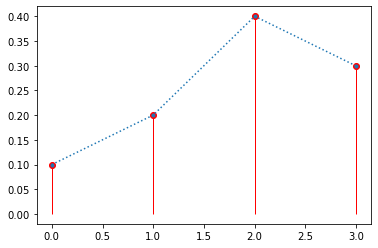

In [39]:
cdfx = np.array([0, .1, .3, .7, 1.])  # CDF
U = np.random.random(size=1000000)
X_sim = [np.where(cdfx < ui)[0][-1] for ui in U]

x = np.arange(0, 4)
pmfx = np.array([.1, .2, .4, .3])
plot_pmf(x, pmfx)
x_sim, f_sim = np.unique(X_sim, return_counts=True)
plt.plot(x_sim, f_sim/f_sim.sum(), ':.')

### Some extra examples of simulating probability and randomness

1. What is the probability of a 1D random walk returning to the origin.

2. A certain family has 6 children, consisting of 3 boys and 3 girls. Assuming that all birth orders are equally likely, what is the probability that the 3 eldest children are the 3 girls?

3. A city with 6 districts has 6 robberies in a particular week. Assume the robberies are located randomly, with all possibilities for which robbery occurred where equally likely. What is the probability that some district had more than 1 robbery?

4. Tyrion, Cersei, and ten other people are sitting at a round table, with their seating arrangement having been randomly assigned. What is the probability that Tyrion and Cersei are sitting next to each other?


([<matplotlib.lines.Line2D at 0x1defc61f1f0>], 98)

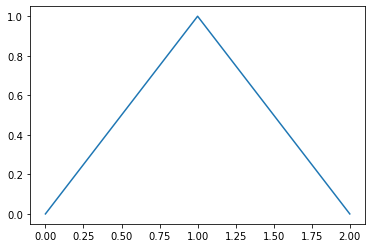

In [11]:
# Write code here

steps = 1000

origin = 0

simulations = 100
got_back = 0
for i in range(simulations):
    walk = [origin]
    for i in range(steps):
        walk += [walk[-1] + np.random.randint(2)*2-1]
        if walk[-1] == 0:
            got_back += 1
            break

plt.plot(walk), got_back

In [12]:
walk

[0, 1, 0]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>